# EE386 Digital Signa Processing Lab
## Experiment 7

In [9]:
# Importing necessary libraries and modules
import numpy as np
import IPython
import scipy
import math
import control
import matplotlib
from scipy import signal as sp
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy.io import wavfile

In [10]:
%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 10})

pi = np.pi

In [11]:
#Roll number: 191EE238
alpha = 1 + 238 % 3  
print(alpha)

2


#### Problem 1

In [12]:
# Window
M = 11
t = np.linspace(0,3*pi,num = M)
#rect = 1 * np.ones(t.shape)
#han = 0.5 - 0.5 * np.cos(2*pi*t/(M-1))  
#ham = 0.54 - 0.46 * np.cos(2*pi*t/(M-1))

In [13]:
rec = sp.get_window('boxcar', M)
han = sp.get_window('hanning', M)
ham = sp.get_window('hamming', M)


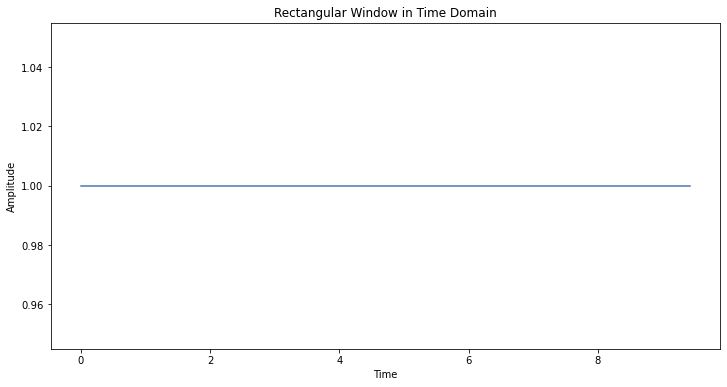

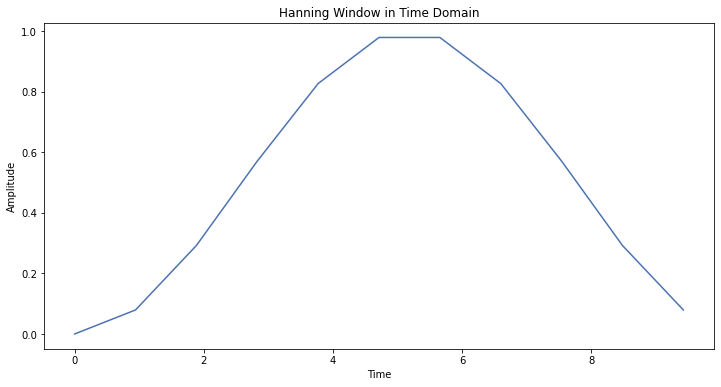

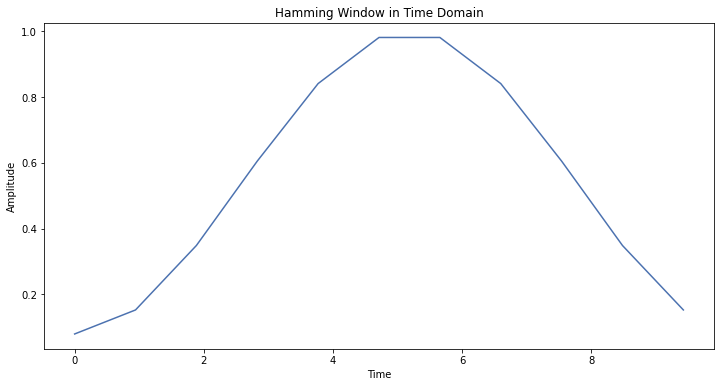

In [17]:
plt.plot(t,rec, label = 'Rectangular Window')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Rectangular Window in Time Domain")
plt.savefig("Experiment-7/Results/rect")
plt.figure()

plt.plot(t,han,label = 'Hanning Window')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Hanning Window in Time Domain")
plt.savefig("Experiment-7/Results/han")
plt.figure()

plt.plot(t,ham,label = 'Hamming Window')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Hamming Window in Time Domain")
plt.savefig("Experiment-7/Results/ham")
Fs = M

In [18]:

def plot_bode(frequency, mag,title=None,x_label=None,y_label=None,row= None):
    
    axs[row].grid(b=True, which='major', linestyle='-')
    axs[row].grid(b=True, which='minor', linestyle='-')
    axs[row].minorticks_on()
    if row == 0:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), 20*np.log10(np.abs(mag)))
    else:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), np.unwrap(np.angle(mag))) 
    

    axs[row].set_title(title, fontsize = 15)
    axs[row].set_xlabel(x_label, fontsize = 15)
    axs[row].set_ylabel(y_label, fontsize = 15)
    axs[row].tick_params(axis="both", labelsize = 15)


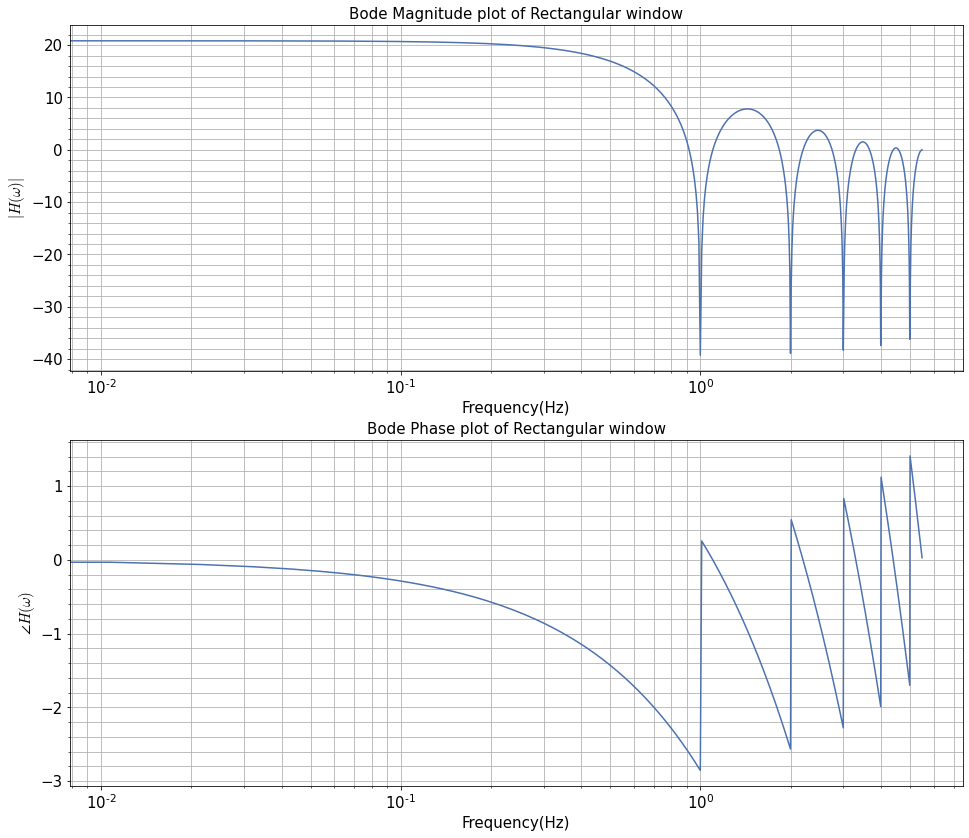

In [19]:
freq, mag = sp.freqz(rec, 1)
fig, axs = plt.subplots(2, figsize = (16,14))
    
plot_bode(freq,mag,title = "Bode Magnitude plot of Rectangular window", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot of Rectangular window", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega)$",row = 1)

plt.savefig("Experiment-7/Results/bode_rect")

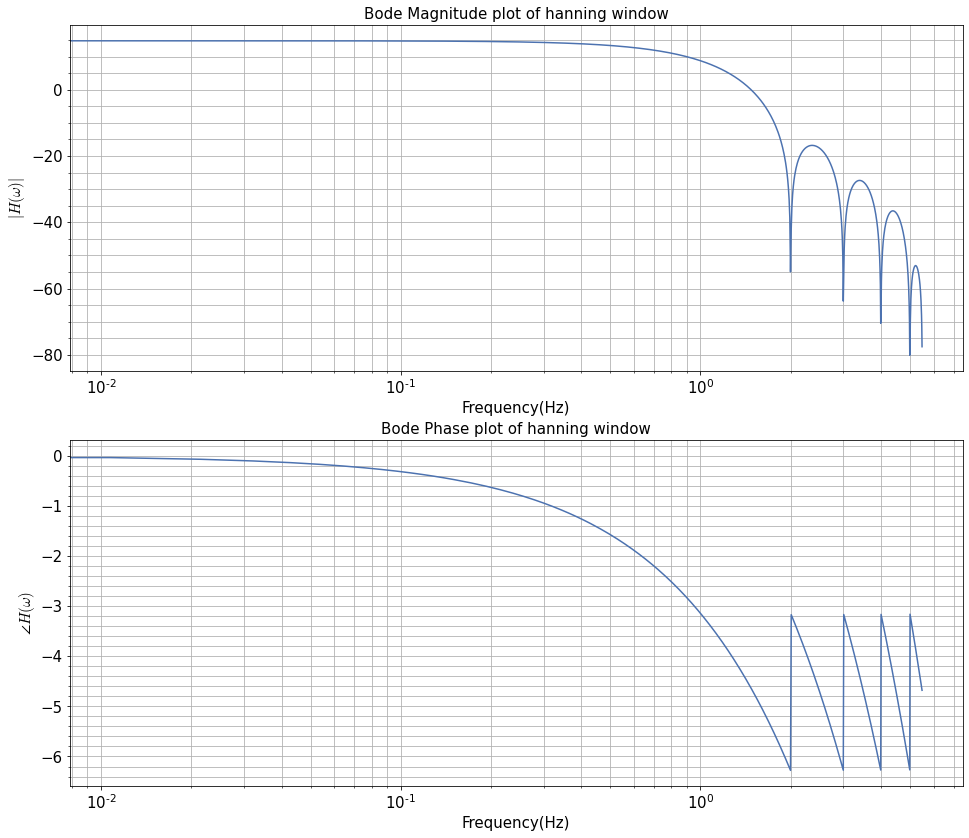

In [20]:
freq, mag = sp.freqz(han, 1)
fig, axs = plt.subplots(2, figsize = (16,14))
    
plot_bode(freq,mag,title = "Bode Magnitude plot of hanning window", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot of hanning window", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega)$",row = 1)
plt.savefig("Experiment-7/Results/bode_han")

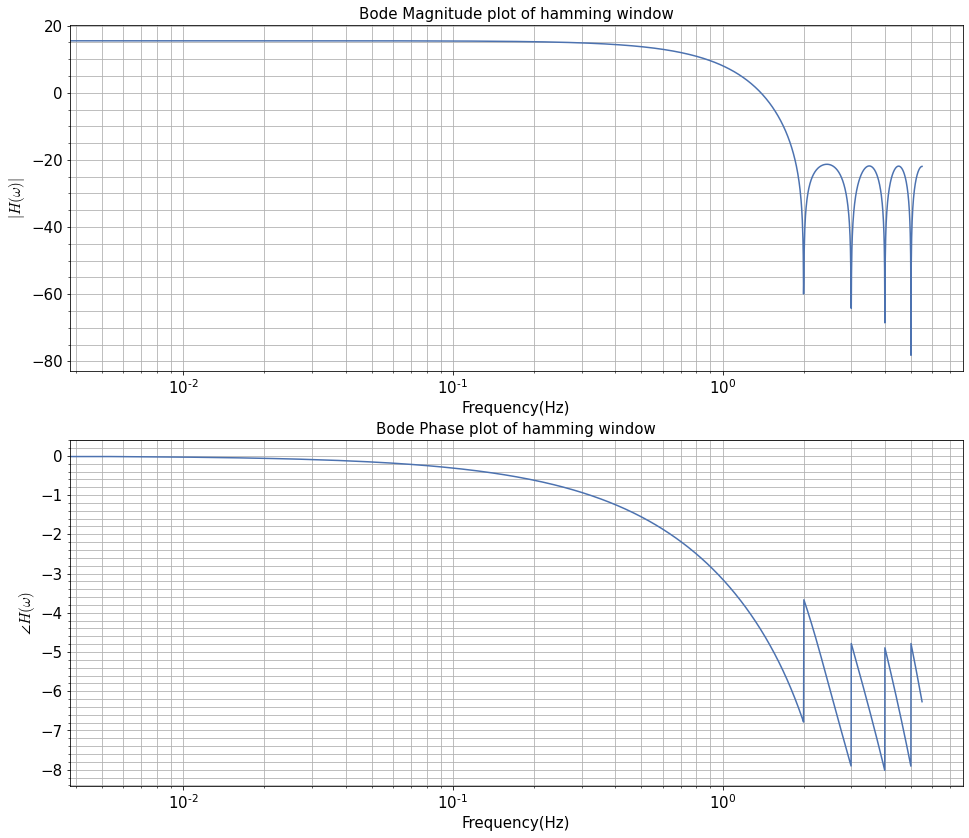

In [21]:
freq, mag = sp.freqz(ham, 1, 1024)
fig, axs = plt.subplots(2, figsize = (16,14))
    
plot_bode(freq,mag,title = "Bode Magnitude plot of hamming window", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot of hamming window", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega)$",row = 1)

plt.savefig("Experiment-7/Results/bode_ham")

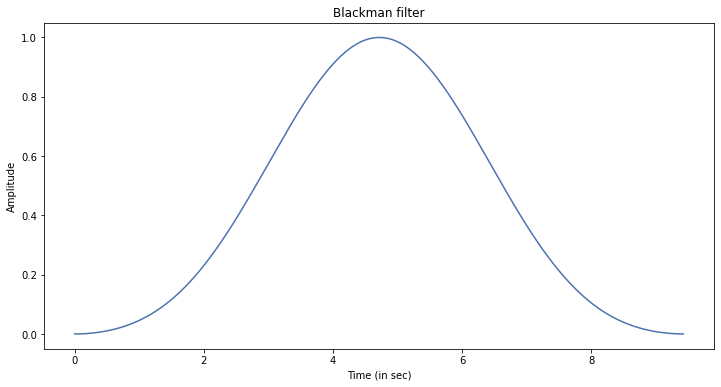

In [23]:
#Part 2
Fs = 1024
t = np.linspace(0,3*pi,Fs)
blackman = sp.get_window("blackman", Fs)

plt.plot(t,blackman)
plt.xlabel("Time (in sec)")
plt.ylabel("Amplitude")
plt.title("Blackman filter")

plt.savefig("Experiment-7/Results/blackman_time")

In [24]:
def plot_mag(x, Fs,samples=None,Title = None,norm = False,interpolate = True):
    
    if samples == None:
        C = int(len(x) / 2)
    else:
        C = samples
        
    X = np.abs(np.fft.fft(x)[0:C])
    N = Fs * np.arange(0, C) / C;
    
    X_norm = X
    if norm:
        X_norm = (1/C) * X;
    
    if interpolate:
        plt.plot(N, X_norm)
        plt.xlabel("Frequency")
        plt.ylabel("Amplitude")
    else:
        plt.stem(N, X_norm)
        plt.xlabel("Frequency")
        plt.ylabel("Amplitude")
    
    if Title:
        plt.title(Title)
    
    return N, X_norm


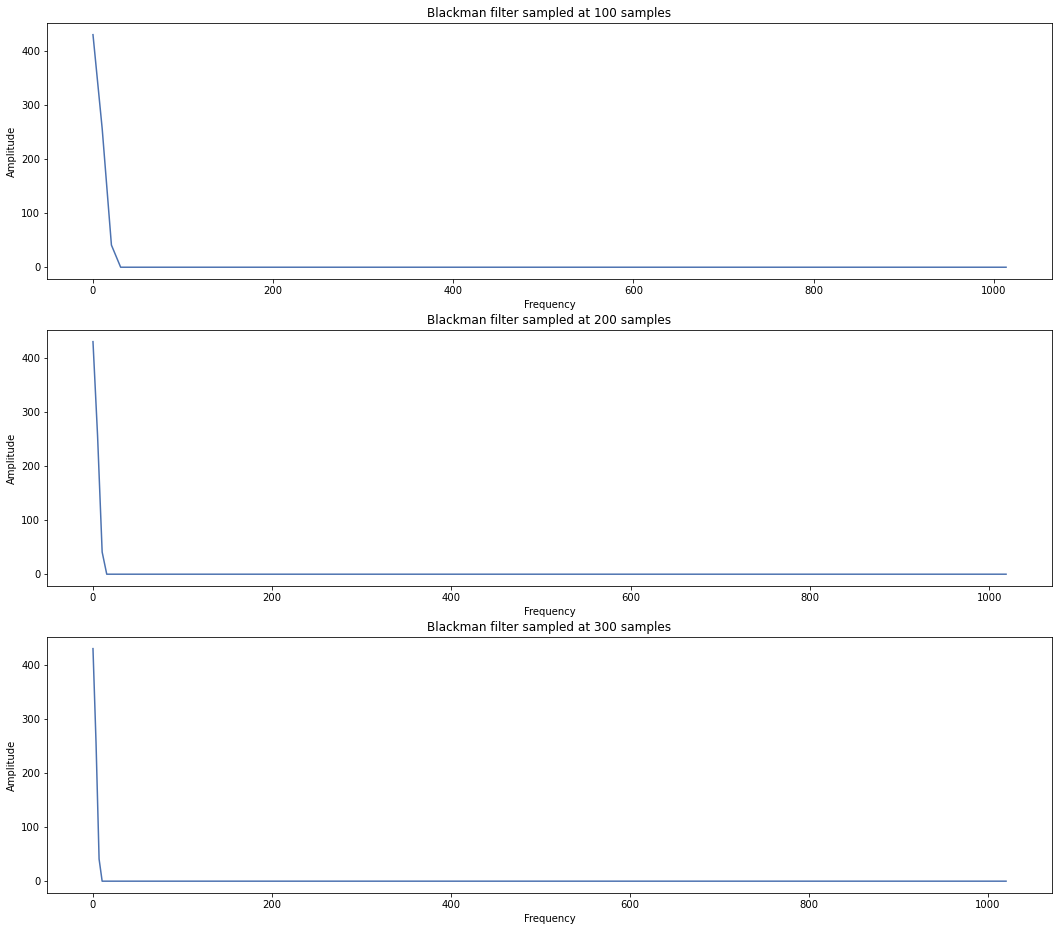

In [25]:
plt.figure(figsize = (18,16))
plt.subplot(3,1,1)
_,_ = plot_mag(blackman, Fs , samples = 100, Title = "Blackman filter sampled at 100 samples")
plt.subplot(3,1,2)
_,_ = plot_mag(blackman, Fs , samples = 200, Title = "Blackman filter sampled at 200 samples")
plt.subplot(3,1,3)
_,_ = plot_mag(blackman, Fs , samples = 300, Title = "Blackman filter sampled at 300 samples")

plt.savefig("Experiment-7/Results/blackaman_spectrum")

#### Problem 2

Given, <br>
M = 21. <br>
$\omega_c = \frac{\pi}{\alpha + 1} = \frac{\pi}{3}$ rad/sample.

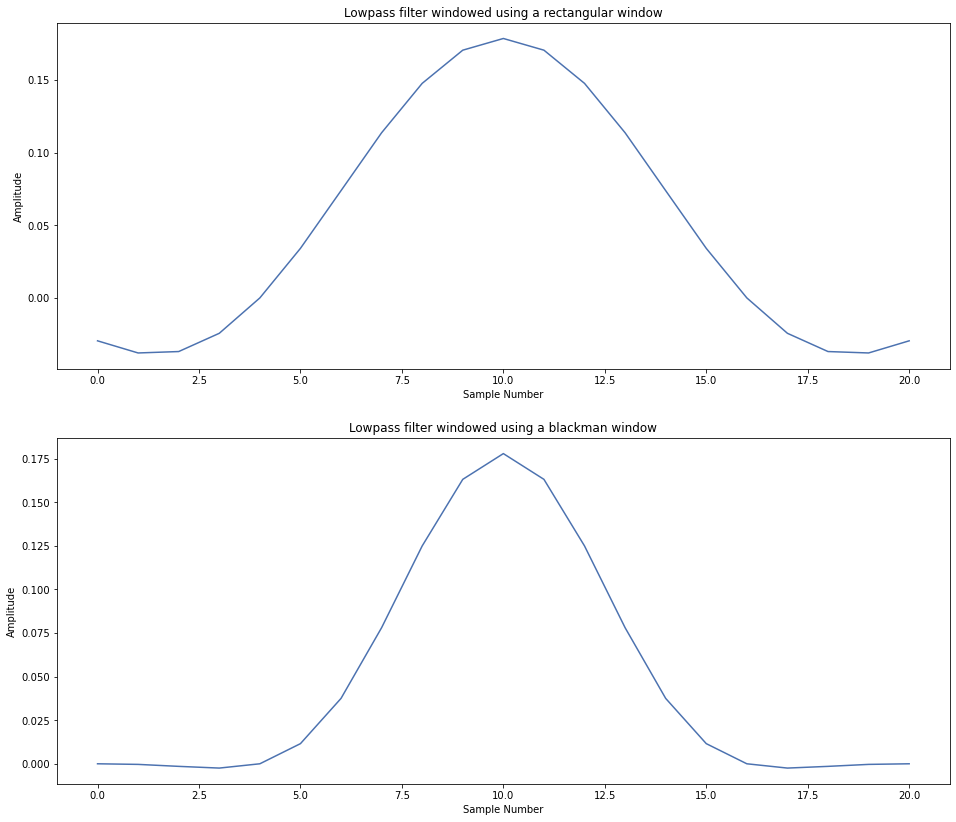

In [26]:
M = 21
Fc = pi/(alpha + 1) *(1/(2*pi)) 
low_black = sp.firwin(numtaps = M, cutoff = Fc, window='blackman', pass_zero='lowpass')
low_rec = sp.firwin(numtaps = M, cutoff = Fc, window='boxcar', pass_zero='lowpass')

plt.figure(figsize = (16,14))

plt.subplot(2,1,1)
plt.plot(low_rec)
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Lowpass filter windowed using a rectangular window")

plt.subplot(2,1,2)
plt.plot(low_black)
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Lowpass filter windowed using a blackman window")

plt.savefig("Experiment-7/Results/lowpass_rec_black")



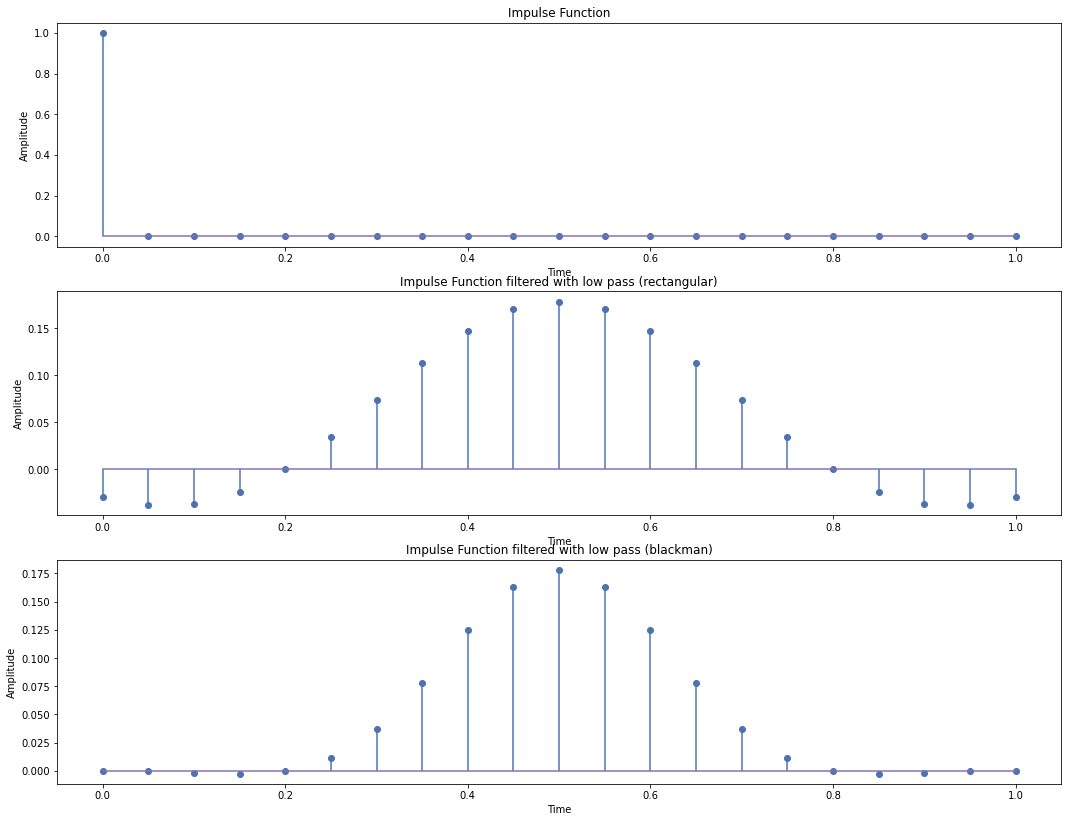

In [27]:
t = np.linspace(0, 1, num = M)
impulse = np.hstack((np.array([1]),np.zeros(M- 1)))

y1 = sp.lfilter(low_rec,1 , impulse)
y2 = sp.lfilter(low_black,1 , impulse)


plt.figure(figsize = (18,14))

plt.subplot(3,1,1)
plt.stem(t,impulse)
plt.title("Impulse Function")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(3,1,2)
plt.stem(t,y1)
plt.title("Impulse Function filtered with low pass (rectangular)")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(3,1,3)
plt.stem(t,y2)
plt.title("Impulse Function filtered with low pass (blackman)")
plt.xlabel("Time")
plt.ylabel("Amplitude")


plt.savefig("Experiment-7/Results/Impulse_")

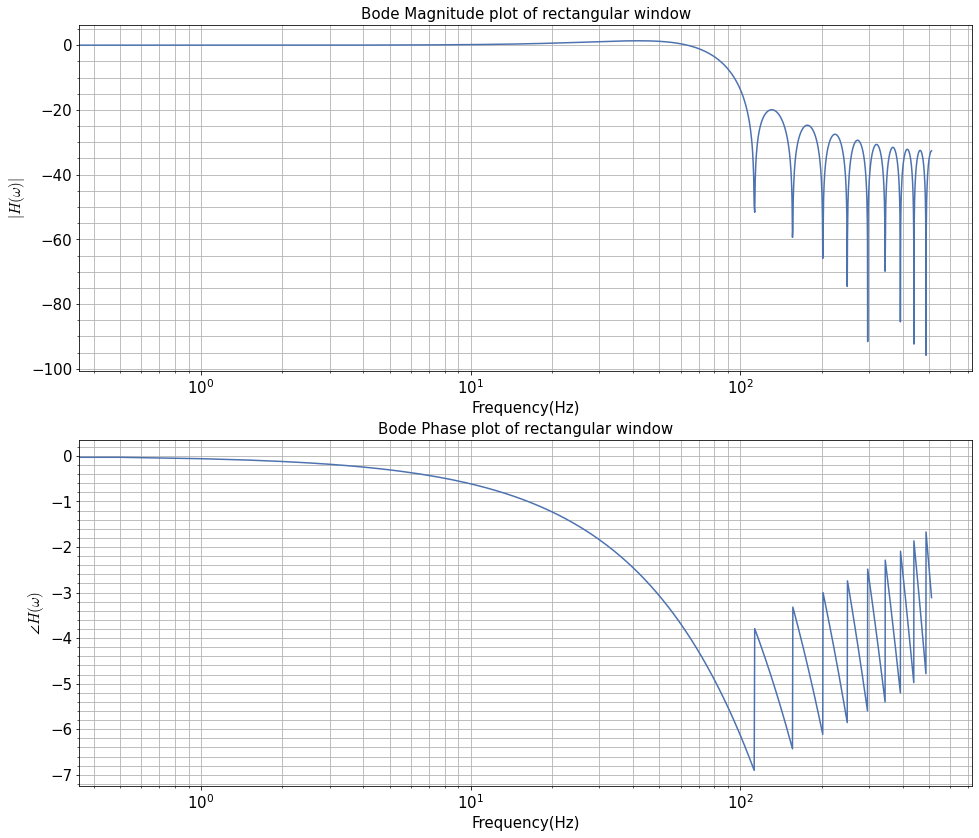

In [28]:
freq, mag = sp.freqz(low_rec, 1, 1024)
fig, axs = plt.subplots(2, figsize = (16,14))
    
plot_bode(freq,mag,title = "Bode Magnitude plot of rectangular window", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot of rectangular window", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega)$",row = 1)

plt.savefig("Experiment-7/Results/bode_rec_low")

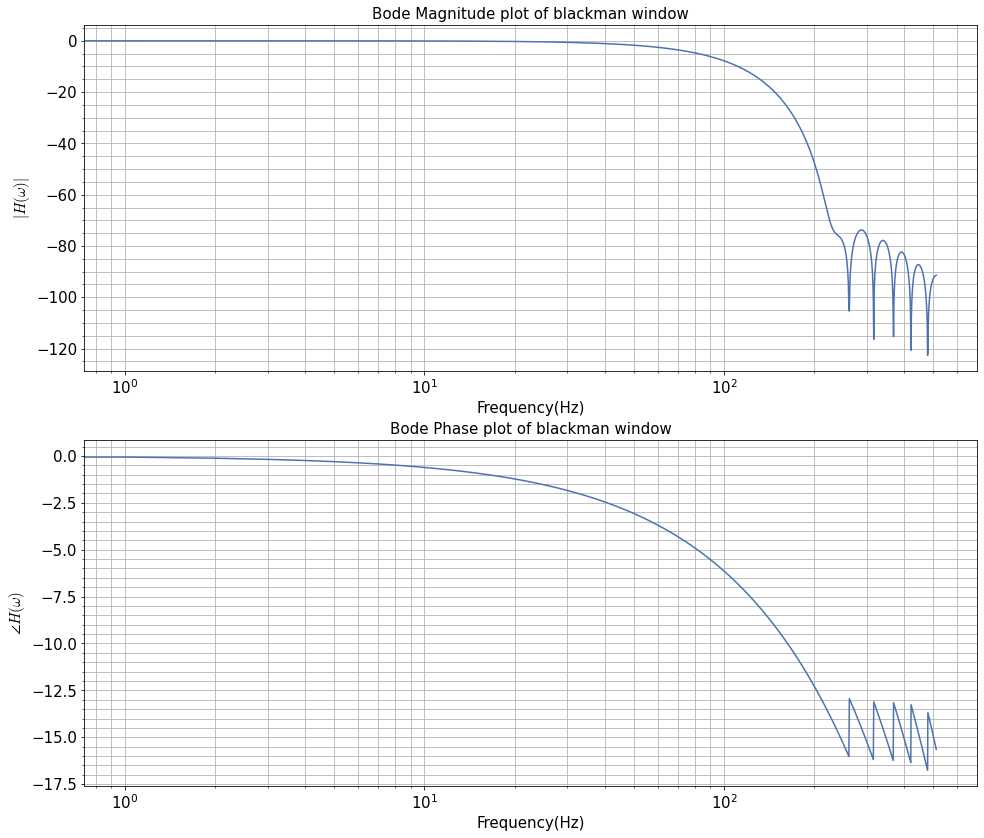

In [29]:

freq, mag = sp.freqz(low_black, 1)
fig, axs = plt.subplots(2, figsize = (16,14))
    
plot_bode(freq,mag,title = "Bode Magnitude plot of blackman window", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot of blackman window", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega)$",row = 1)

plt.savefig("Experiment-7/Results/bode_black_low")

#### Problem 3

In [30]:
def plot_spectro(x, Fs, Window,samples, Nperseg, Noverlap):
    
    ft, tx, Sx = sp.spectrogram(x,Fs, window = Window,nperseg = Nperseg, noverlap = Noverlap)
    
    if samples:
        plt.pcolormesh(tx[0:samples],ft[0:samples], Sx[0:samples][0:samples], shading = 'gouraud')
    else:
        plt.pcolormesh(tx,ft,Sx, shading = 'gouraud')
        
    cbar = plt.colorbar()
    cbar.set_label('Amplitude')
    cbar.minorticks_on()
    plt.xlabel("Time(sec)")
    plt.ylabel("Frequency(Hz)")
    
    return tx,ft,Sx

In [31]:
Fs_instru, track= wavfile.read('Experiment-7/instru2.wav')
track = track/32767.0
print('Sampling rate of instrument : {}Hz'.format(Fs_instru))
print('Size of instrument signal: {}'.format(track.shape))
IPython.display.Audio(track, rate = Fs_instru)

Sampling rate of instrument : 11025Hz
Size of instrument signal: (39500,)


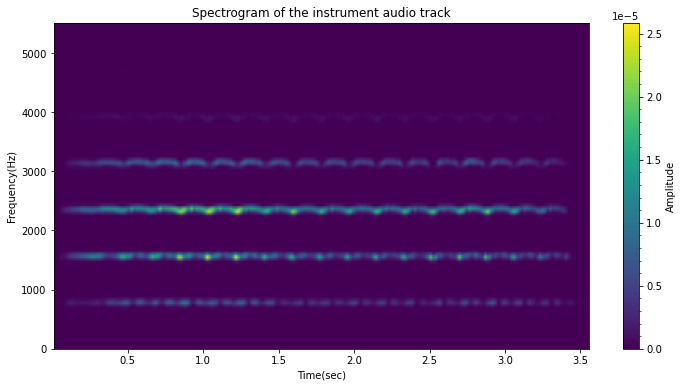

In [32]:
t,f,S = plot_spectro(track, Fs = Fs_instru, Window = 'hanning',samples = None,Nperseg = 200,Noverlap = 10)
plt.title("Spectrogram of the instrument audio track")

plt.savefig("Experiment-7/Results/Spectro_track")

In [33]:
peak, _= sp.find_peaks(S[:,10],threshold = 1e-8)
print("Frequencies present:",f[peak])

Frequencies present: [ 771.75  1598.625 2370.375 3142.125 3913.875]


Assuming specifications for a band pass filter as follows: 

In [34]:
f1 = 500                               #Pass band frequency = 500 Hz
f2 = 1000                              #Pass band frequency = 1000 Hz
Fs = 11025                             #Sampling frequency = 11025 Hz

In [35]:
band_han = sp.firwin(numtaps = 2205 , cutoff = [f1, f2] , window='hanning', pass_zero='bandpass',fs = 11025)

track_filtered = sp.lfilter(band_han,1 , track)

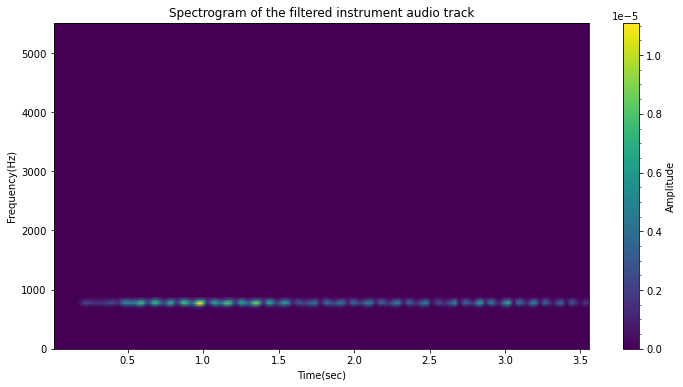

In [36]:
t,f,S = plot_spectro(track_filtered, Fs = Fs_instru, Window = 'hanning',samples = None,Nperseg = 200,Noverlap = 10)
plt.title("Spectrogram of the filtered instrument audio track")

plt.savefig("Experiment-7/Results/Spectro_track_filtered")

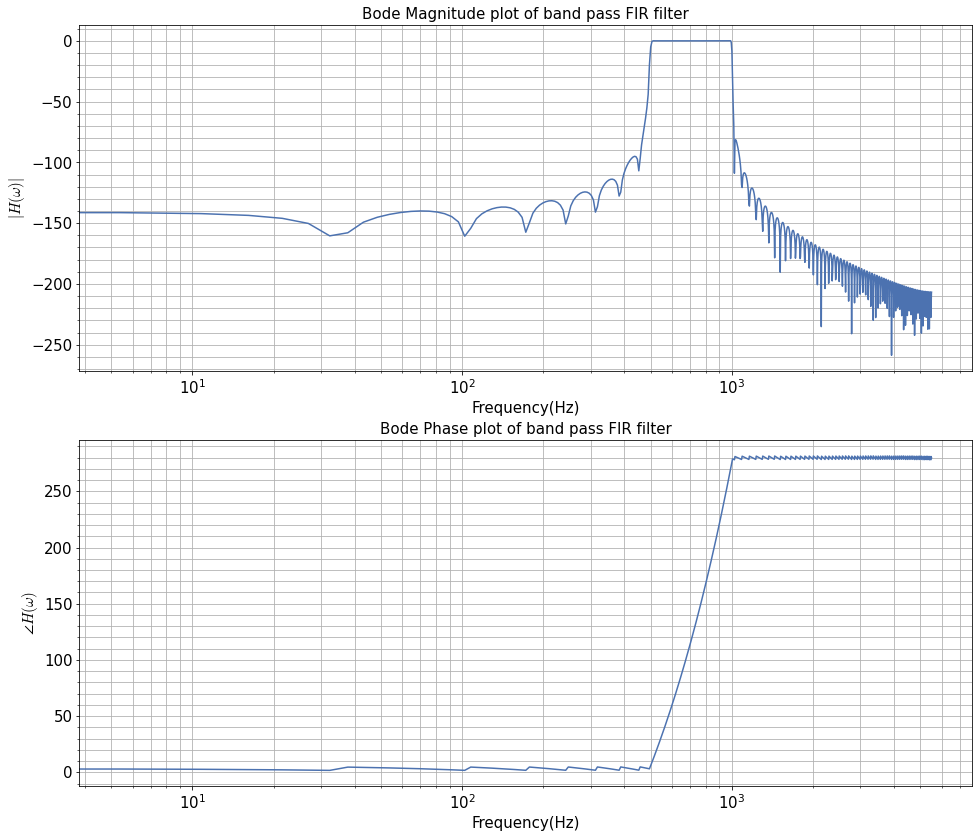

In [37]:
freq, mag = sp.freqz(band_han, 1, 1024)
fig, axs = plt.subplots(2, figsize = (16,14))
    
plot_bode(freq,mag,title = "Bode Magnitude plot of band pass FIR filter", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot of band pass FIR filter", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega)$",row = 1)

plt.savefig("Experiment-7/Results/Bode_band")

In [38]:
wavfile.write("Experiment-7/Results/filtered_track.wav", Fs, track_filtered)
IPython.display.Audio(track_filtered, rate = Fs)

#### Problem 4

Considering a hamming window and low pass band filter windowed with Hamming

In [39]:
t= np.linspace(0, 2*pi, num = 1024)
y = np.sin(2*pi*20*t) + np.sin(2*pi*200*t)
M = 11

ham = sp.get_window('hamming', M)
low_pass_ham = sp.firwin(numtaps = M , cutoff = 100 , window='hamming', pass_zero='lowpass', fs = 1000)

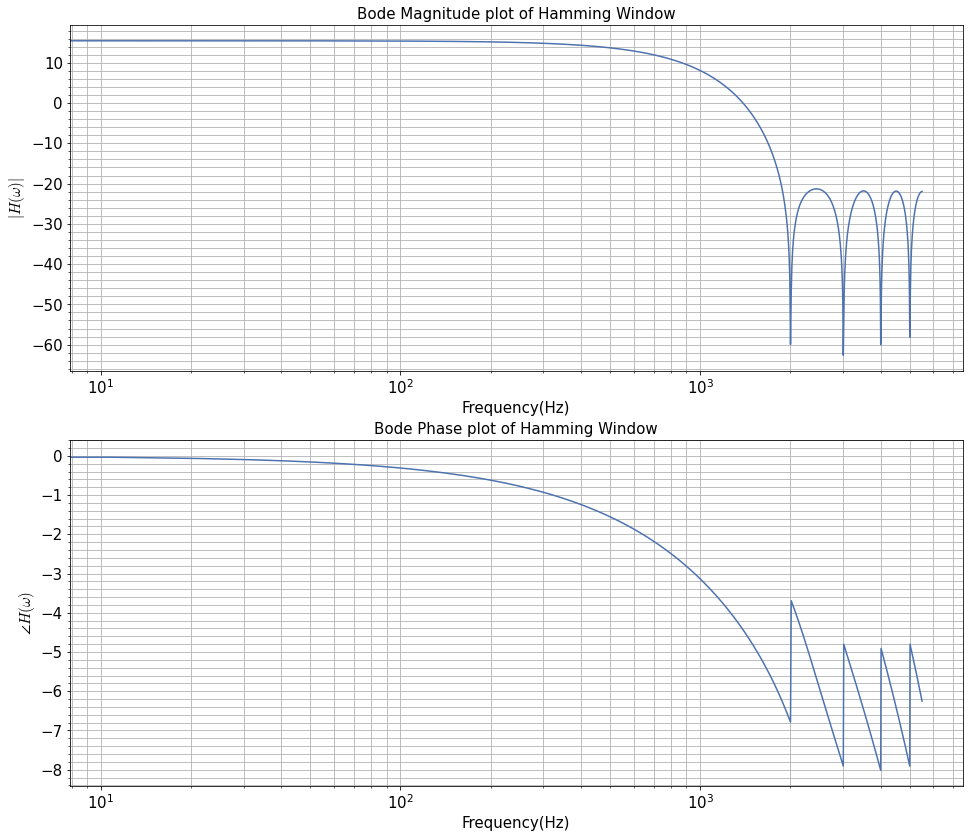

In [40]:
freq, mag = sp.freqz(ham, 1)
fig, axs = plt.subplots(2, figsize = (16,14))
    
plot_bode(freq,mag,title = "Bode Magnitude plot of Hamming Window", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot of Hamming Window", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega)$",row = 1)
    

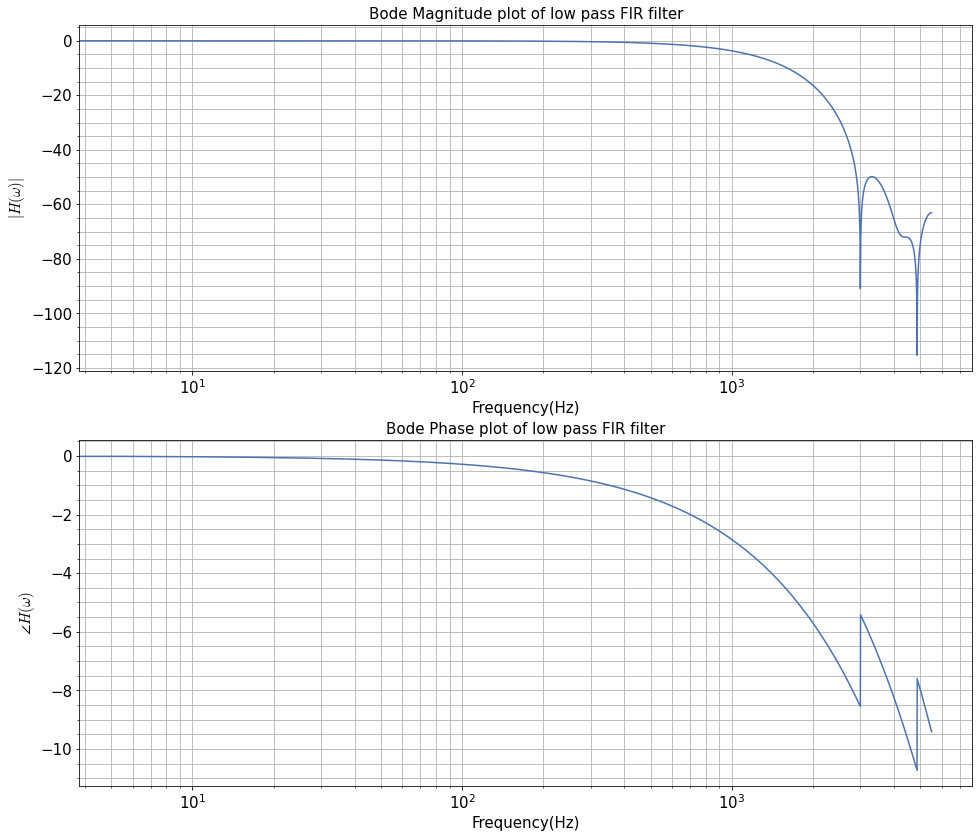

In [42]:

freq, mag = sp.freqz(low_pass_ham, 1, 1024)
fig, axs = plt.subplots(2, figsize = (16,14))
    
plot_bode(freq,mag,title = "Bode Magnitude plot of low pass FIR filter", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot of low pass FIR filter", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega)$",row = 1)
    